**Ahora intentaré realizar de nuevo una red de regresión con NumPy y TensorFlow**

In [1]:
#Importación de librerías

import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow import GradientTape

#Generación de semilla para replicación de datos
np.random.seed(7)

c:\Users\PC\Desktop\functional_api_keras\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\PC\Desktop\functional_api_keras\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\PC\Desktop\functional_api_keras\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto

**Generación de datos artificiales**

In [2]:
#Las filas del array son ejemplos de entrenamiento y las columnas son las características de ese ejemplo de entrenamiento
X = np.random.randn(100, 3) #Generación de 100 datos con 3 características
print(X)

[[ 1.69052570e+00 -4.65937371e-01  3.28201637e-02]
 [ 4.07516283e-01 -7.88923029e-01  2.06557291e-03]
 [-8.90385858e-04 -1.75472431e+00  1.01765801e+00]
 [ 6.00498516e-01 -6.25428974e-01 -1.71548261e-01]
 [ 5.05299374e-01 -2.61356415e-01 -2.42749079e-01]
 [-1.45324141e+00  5.54580312e-01  1.23880905e-01]
 [ 2.74459924e-01 -1.52652453e+00  1.65069969e+00]
 [ 1.54335535e-01 -3.87139943e-01  2.02907222e+00]
 [-4.53860299e-02 -1.45067870e+00 -4.05227855e-01]
 [-2.28831510e+00  1.04939655e+00 -4.16474319e-01]
 [-7.42553525e-01  1.07247013e+00 -1.65107559e+00]
 [ 5.35429356e-01 -2.06441480e+00 -6.62159340e-01]
 [-1.20421985e+00  1.46197563e+00  1.76616088e+00]
 [-3.29413752e-01  8.40733242e-01 -1.79986401e-01]
 [ 5.68061887e-01 -7.52837196e-01 -1.70833920e+00]
 [-1.80309866e+00  3.83121852e-01  2.24759505e+00]
 [ 2.69411631e-01 -5.24604619e-01  1.91201886e+00]
 [ 2.37301847e-01  1.01433985e-01  2.52577736e-01]
 [-1.32377198e-01 -3.09476341e-01 -1.43496347e+00]
 [ 5.01624123e-01 -9.47754504e-

In [3]:
#Revisamos la forma de X
X.shape

(100, 3)

In [4]:
#Ahora generamos las predicciones relativas, aunque para meterle un poco más de realismo a los datos,usaré un ruido gaussiano

#Generación de los resultados de la función x^2 + 3
Y_before = X ** 2 + 3

#Generación de ruido gaussiano
noise = np.random.randn(len(X)) * 0.7 #Este parámetro controla que tan disperso quiero los datos
noise = noise.reshape(100, 1) #Acá se hace un reshape, porque Python se pone gracioso con sus arrays de la forma (n,)

#Sumamos los resultados el ruido gaussiano
Y_noisy = Y_before + noise

**Ahora revisamos el mapa de dispersión de los datos**

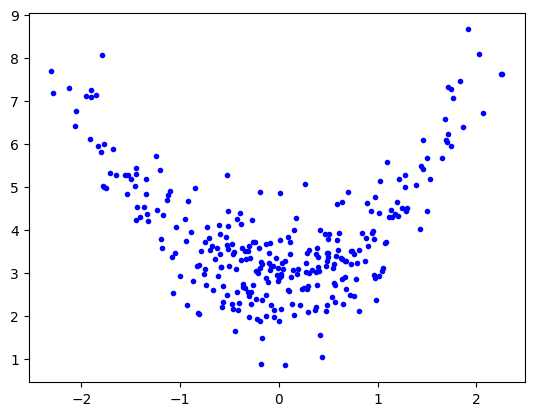

In [5]:
import matplotlib.pyplot as plt


plt.plot(X, Y_noisy, ".b")
plt.show()

**Se ven bien, aunque muy dispersos, pero si desean ajustar el parámetro que les mencioné anteriormente (0.7) a un número < 0.7 les dará datos menos dispersos, ahora realizaré una implementación de Keras con TensorFlow y un poco de NumPy, toda la lógica serán matemáticas puras**

In [6]:
class modelo_reg():
    #Generación del diccionario de pesos (parecido al diccionario stat_dict) y el optimizador ADAM con un lr de 1e-4
    def __init__(self):
        self.weights_bias = {};
        self.optimizer = RMSprop(1e-2)

    #Método de la clase para realizar la obtención del último dígito de la capa
    def get_last_layer_num(self):
        #Revisamos si el diccionario contiene algún elemento
        if self.weights_bias:
            """Si el diccionario tiene elementos, convertimos a una lista las claves de su diccionario y con [-1] 
            obtenemos el último elemento"""
            last_key = list(self.weights_bias.keys())[-1]

            #Una vez obtenemos el último elemento "layerx", obtenemos el string "x" y lo convertimos a entero, donde x es el número de la capa
            return int(last_key[-1])
        else:
            #Si no hay elemento devolvemos 0 porque la lógica del sig. numero es n + 1
            return 0
    
    def input_shape(self, data):
        #Aquí intenté realizar la lógica de la capa de entrada de Keras
        if isinstance(data, np.ndarray): #Revisa si el dato pasado es un array de NumPy
            self.data = data #Se crea una instancia del objeto
        else:
            #Realizamos el control de error
            raise Exception("Input must be a numpy array!")

    def add(self, neurons):
        #GEN DE PESOS Y BIAS
        last_number = self.get_last_layer_num()
        next_number = last_number + 1 #Aquí es donde mencioné que se aplicaba la lógica de n + 1

        #Revisamos la forma de la capa anterior, para obtener la forma de la capa siguiente
        if not self.weights_bias:
            #Si no hay ningún elemento, obtenemos la forma anterior de los datos de entrada
            input_shape = self.data.shape[1]
        else:
            #Si hay algún elemento, obtenmos los strings de los pesos y capa para pasarlos al diccionario y obtener la forma del anterior
            prev_w = f"W{last_number}"
            prev_layer = f"layer{last_number}"
            input_shape = self.weights_bias[prev_layer][prev_w].shape[1]

        #Generación de he_uniform
        limite = np.sqrt(6 / input_shape)

        #Una vez obtenemos la forma de la capa anterior, realizamos la creación de los pesos y sesgos de la siguiente capa
        self.weights_bias[f"layer{next_number}"] = {
            f"W{next_number}" : tf.Variable(np.random.uniform(low = -limite, high= limite, size = (input_shape, neurons)).astype(np.float32)), 
            f"b{next_number}" : tf.Variable(np.zeros((neurons,)).astype(np.float32)) 
    
        }
        """Es más reoomendable empezar en 0 los sesgos para que la red se enfoque primero en los pesos, por si se preguntan, 
            no causa problemas de simetería porque son los pesos los que realmente deben ser aleatorios para evitar que la red no aprenda porque sin
            gradientes no hay aprendizaje automático ☝️🤓"""

    #Realizamos el método fit de Keras muy abstracto
    def fit(self, data_in, epochs):
        if self.weights_bias:
            #Una vez revisamos que el usuario haya declarado capas, realizamos las vueltas por epoch
            for i in range(epochs):
                #Pasamos como inpút los datos X
                input_ = tf.convert_to_tensor(data_in[0], dtype=np.float32)

                #Uso de GradientTape() para evitar calcular y calcular los gradientes manualmente con funciones en el backpropagatoon
                with GradientTape() as tape:

                    #Aquí realizamos el forward pass yendo capa x capa
                    for layer in self.weights_bias:

                            #Obtenemos los pesos y sesgos
                            W = self.weights_bias[layer]["W"+layer[-1]]
                            B = self.weights_bias[layer]["b"+layer[-1]] 

                            #Realizamos la lógica de MLPs donde primero se calcula una función lineal de la forma W*X + B
                            z = tf.matmul(input_, W) + B #(100, 3) * (100, 64)
                            #Después de la función lineal, ocupamos una función de activación que son funciones no lineales para romper la simetría de los pesos y sesgos para aprender cosas más complejas
                            a = tf.nn.leaky_relu(z, alpha=0.1)

                            #Retornamos la variable A que es la salida de la capa
                            input_ = a
                    
                    #Calculamos la función de coste (que es una función de perdida, pero de todos los datos) para obtener el error
                    loss = tf.reduce_mean(tf.square(tf.convert_to_tensor(data_in[1], dtype=np.float32) - a))

                    # -- Pasos para la regularización L2 o Ridge mejor dicho xd ---

                    # Fórmula pa: total_loss = loss + lambda / 2 * sum(l2_loss) asd

                    # 1. Definir el hiperparámetro de regularización (lambda)
                    l2_lambda = 1e-4

                    # 2. Calcular el término de regularización L2
                    l2_loss = 0.0
                    for layer in self.weights_bias:
                        # Sumar el cuadrado de los pesos de cada capa
                        W = self.weights_bias[layer]["W" + layer[-1]]
                        l2_loss += tf.reduce_sum(tf.square(W)) #Acá axis es igual a 0, por flas pa
                    
                    # 3. Sumar la pérdida de regularización a la pérdida original
                    total_loss = loss + (l2_lambda / 2) * l2_loss
                    
                    #Realizamos la lógica para que solo imprima el error cuando sea la capa 10, 20, 30, etc. Para evitar mucho texto en la salida.
                    if i % 10 == 0:
                        print(total_loss)

                    #Generamos la lista donde pondremos los pesos y sesgos sin que sea un diccionario de Python
                    variables = []

                    #Obtención de la lista de pesos y sesgos
                    for layer in self.weights_bias:
                        variables.extend(list(self.weights_bias[layer].values())) #Usamos extend() porque append() no es para objetos iterables y extend() si
                    gradientes = tape.gradient(total_loss, variables) # Calculamos los gradientes de la pérdida con respecto a los pesos y sesgos

                    #Modificamos los pesos y sesgos en base a su gradiente, donde la forma matemática es: "W: W_anterior - lr * dw/dL"
                    self.optimizer.apply_gradients(zip(gradientes, variables))


In [7]:
#Creación de la instancia del modelo
modelo = modelo_reg()

In [8]:
#Generación de las capas

modelo.input_shape(X)
modelo.add(64)
modelo.add(64)
modelo.add(32)
modelo.add(32)
modelo.add(16)
modelo.add(8)
modelo.add(4)
modelo.add(3)

In [9]:
#Visualización de los pesos y sesgos
modelo.weights_bias

{'layer1': {'W1': <tf.Variable 'Variable:0' shape=(3, 64) dtype=float32, numpy=
  array([[ 1.2064337 , -0.09189934,  0.23441488, -0.77346265, -0.7286078 ,
           0.06254273, -0.76592404, -1.3286457 , -0.3721985 ,  0.7069516 ,
          -0.6305407 ,  1.0258816 ,  0.57276326,  0.43365192,  1.1101099 ,
          -1.2054445 , -0.90858865,  1.157591  ,  1.1512755 , -1.1928403 ,
           0.77564394, -1.3705641 , -1.0317097 , -1.1037638 , -0.5826685 ,
          -0.31602463,  1.1621268 , -0.17989415, -1.0639155 , -0.643895  ,
          -1.3961772 , -1.3348778 , -0.19496822,  0.03447363, -0.7072154 ,
          -0.33971554, -1.1218419 ,  0.4492152 , -0.3037573 , -0.9573502 ,
          -0.00737192, -0.8248405 , -0.5879472 , -1.0630065 ,  0.7940257 ,
          -0.6241908 ,  1.2888482 , -0.26747894, -0.9752573 ,  0.5804299 ,
           0.6606022 ,  1.0785348 , -1.0422401 ,  0.8199213 ,  1.0175524 ,
          -0.55290574, -0.12874383,  0.33839858, -0.71979755,  1.0503532 ,
           0.5634064

In [10]:
#Entrenamiento del modelo
modelo.fit((X, Y_noisy), epochs = 1000)

tf.Tensor(14.657627, shape=(), dtype=float32)
tf.Tensor(6.8878007, shape=(), dtype=float32)
tf.Tensor(6.469496, shape=(), dtype=float32)
tf.Tensor(3.8984947, shape=(), dtype=float32)
tf.Tensor(1.9036688, shape=(), dtype=float32)
tf.Tensor(1.4624748, shape=(), dtype=float32)
tf.Tensor(1.2026707, shape=(), dtype=float32)
tf.Tensor(1.1264706, shape=(), dtype=float32)
tf.Tensor(1.1646495, shape=(), dtype=float32)
tf.Tensor(0.94659245, shape=(), dtype=float32)
tf.Tensor(0.85516536, shape=(), dtype=float32)
tf.Tensor(0.70658636, shape=(), dtype=float32)
tf.Tensor(0.770225, shape=(), dtype=float32)
tf.Tensor(0.70571315, shape=(), dtype=float32)
tf.Tensor(0.61420983, shape=(), dtype=float32)
tf.Tensor(0.8452449, shape=(), dtype=float32)
tf.Tensor(0.646573, shape=(), dtype=float32)
tf.Tensor(0.5422067, shape=(), dtype=float32)
tf.Tensor(0.56378925, shape=(), dtype=float32)
tf.Tensor(0.5497764, shape=(), dtype=float32)
tf.Tensor(0.60967827, shape=(), dtype=float32)
tf.Tensor(0.53869444, shape=()

In [11]:
#Verificamos que los pesos realmente hayan cambiado
modelo.weights_bias

{'layer1': {'W1': <tf.Variable 'Variable:0' shape=(3, 64) dtype=float32, numpy=
  array([[ 1.1803852e+00, -6.5378942e-02,  2.5189474e-01, -4.1808441e-01,
          -4.6977994e-01, -2.5429267e-01, -8.9089102e-01, -9.4205242e-01,
          -1.9440936e-01,  4.3973723e-01, -7.2235274e-01,  6.2674439e-01,
           5.6435162e-01,  1.9857439e-01,  8.6488175e-01, -8.4579915e-01,
          -7.4498069e-01,  9.9880320e-01,  1.1875346e+00, -8.5321873e-01,
           6.7753565e-01, -1.2554756e+00, -6.0209614e-01, -9.1027784e-01,
          -4.5592895e-01, -8.6076409e-02,  9.1446143e-01,  7.0466250e-02,
          -1.1686658e+00, -5.4466462e-01, -1.0948924e+00, -1.1006112e+00,
          -3.2059953e-01,  5.7331108e-02, -4.3615785e-01, -8.9713460e-01,
          -6.5962845e-01,  5.3551561e-01, -1.8168369e-01, -8.6528355e-01,
           9.9105656e-02, -6.9640911e-01, -4.5692304e-01, -5.8987594e-01,
           8.9469299e-02, -5.2062237e-01,  1.1627138e+00, -3.0624318e-01,
          -6.5601087e-01,  3.260

**Errores y como los solucione**

`Error donde no actualizaban los pesos y sesgos`: Este error me sucedió cuando antes de usar Adam como optimizador para actualizar pesos, intenté implementarlo solamente con GradientTape puro sin optimizadores, lo cual el problema causado era que no observaba las variables de TensorFlow, aunque pude optar por el método .watch de GradientTape, pensé que sería mejor opción el optimizador ADAM

`Problemas con ReLU`: Antes de optar por Leaky ReLU, opté por la función de activación ReLU, pero al pasar los datos por la función, se terminaban haciendo la gran mayoría 0, por lo que no había gradiente y eso optaba por cancelar el gradiente para ese peso de x capa.

**Observaciones** 

`Los pesos utilizan una inicialización He_uniform aplicada con matemáticas`: Para evitar que el gradiente explote o se desvanezca opté por una inicialización con he_uniform para hacerlos más... ¿Cómo decirlo? Apetecibles o que sea más fácil calcular el gradiente, mejor dicho.

`Aprendizaje`: Logré aplicar la lógica a muy bajo nivel de cómo funciona Keras y aprender como funciona Keras, aunque también conozco la matemática de CNNs (kernels, mapas de activación, maxpooling, etc.) no quise implementar una CNN y preferí por una red MLP (Multi perceptrones), asi también aprendí a entrenar modelos a mano.